# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### Team Member 1 - Vishal Kumar Yadav
##### Team Member 2 - Khushboo Yadav


# **Project Summary -**

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers



# **GitHub Link -**

https://github.com/mak32849/Online-Retail-Customer-Segmentation

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [ ]:
# First 5 Rows of Dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom

In [ ]:
# Last 5 rows of Dataset
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID Country  
541904  12-09-2011 12:50       0.85     12680.0  France  
541905  12-09-2011 12:50       2.10     12680.0  France  
541906  12-09-2011 12:50       4.15     12680.0  France  
541907  12-09-2011 12:50       4.15     12680.0  France  
541908  12-09-2011 12:50       4.95     12680.0  France

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Total Number of Rows 
df.size

4335272

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Description of Data 
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

#### Duplicate Values

In [ ]:
# Checking duplicate values in Dataset
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

In [ ]:
# Droping duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
# Again check duplicate value in dataset
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

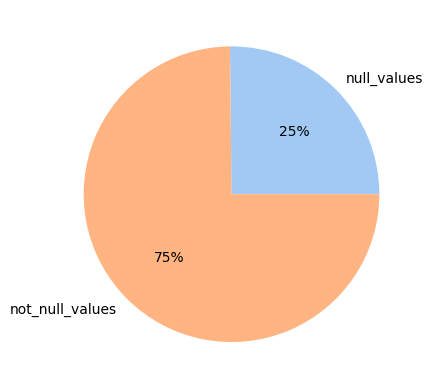

In [ ]:
# Visualizing the missing values
null_values = df['CustomerID'].isnull().sum()
non_null_values = df['CustomerID'].notnull().sum()

data = [null_values, non_null_values]
labels = ['null_values', 'not_null_values']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

- Since the null values predominant in "CustomerID", more than 5%, and it is a distinct so we will simply remove this column.

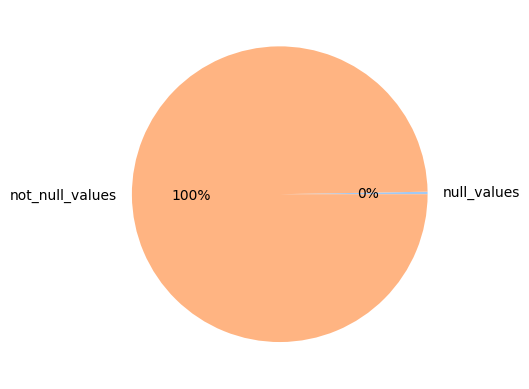

In [ ]:
# Visualizing the missing values
null_values = df['Description'].isnull().sum()
non_null_values = df['Description'].notnull().sum()

data = [null_values, non_null_values]
labels = ['null_values', 'not_null_values']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Since the null values in the column "Description" and "Country" are very less so we can drop the rows.

In [ ]:
#Handling the null values
df.dropna(inplace=True)

In [ ]:
#Again checking the null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns                                          

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()                                                    

Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000

## Data Cleaning

Quantity and Unitprice can never be a Negative value

In [ ]:
# Filter out records with negative values
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

- since the quantity can not be in negative so we will remove those rows.

In [ ]:
#Check for missing values in the dataset
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
df = df[pd.notnull(df['CustomerID'])]

# **Exploratory data analysis**

In [ ]:
#Customer distribution by country
cust_data=df.groupby("Country")["CustomerID"].count().reset_index().sort_values('CustomerID', ascending=False)
print(cust_data)

                 Country  CustomerID
35        United Kingdom      349203
14               Germany        9025
13                France        8326
10                  EIRE        7226
30                 Spain        2479
23           Netherlands        2359
3                Belgium        2031
32           Switzerland        1841
26              Portugal        1453
0              Australia        1181
24                Norway        1071
18                 Italy         758
6        Channel Islands         747
12               Finland         685
7                 Cyprus         603
31                Sweden         450
1                Austria         398
9                Denmark         380
25                Poland         330
19                 Japan         321
17                Israel         245
36           Unspecified         241
29             Singapore         222
16               Iceland         182
33                   USA         179
5                 Canada         151
1

**Description Name**

In [ ]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1713
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1389

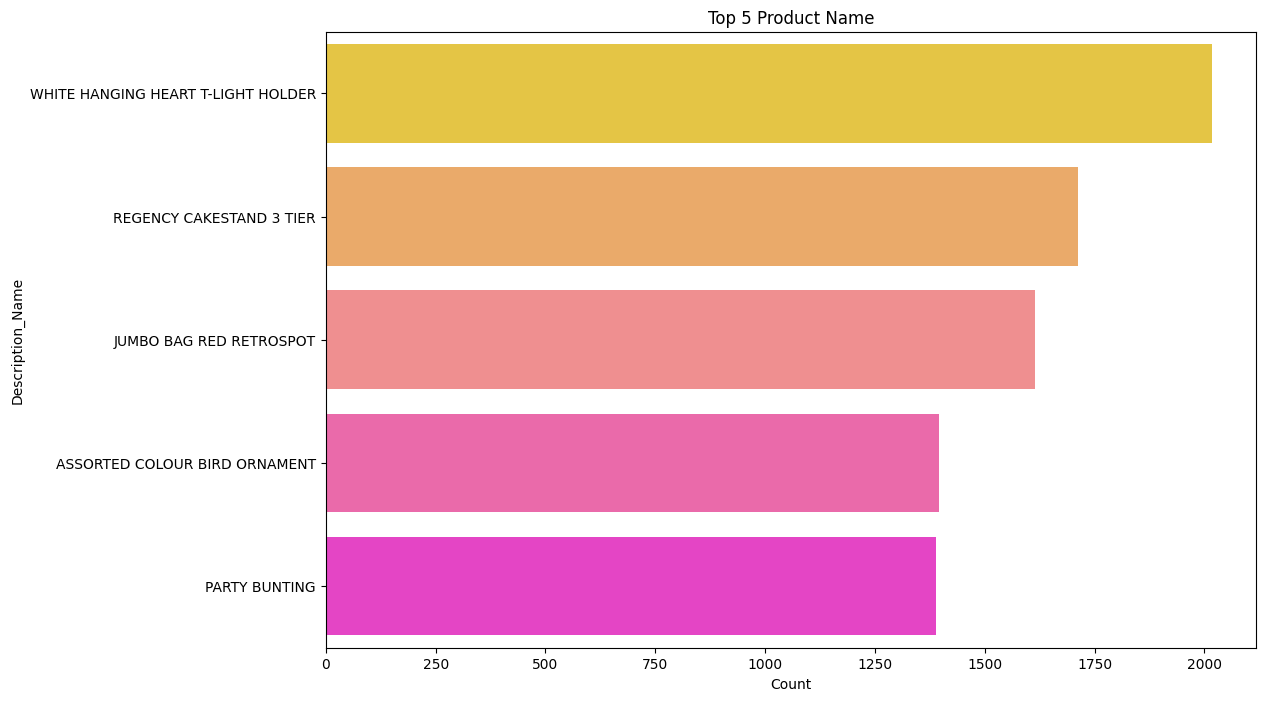

In [ ]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

**StockCode Name**

In [ ]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()                                                       

StockCode_Name  Count
0         85123A   2023
1          22423   1713
2         85099B   1615
3          84879   1395
4          47566   1389

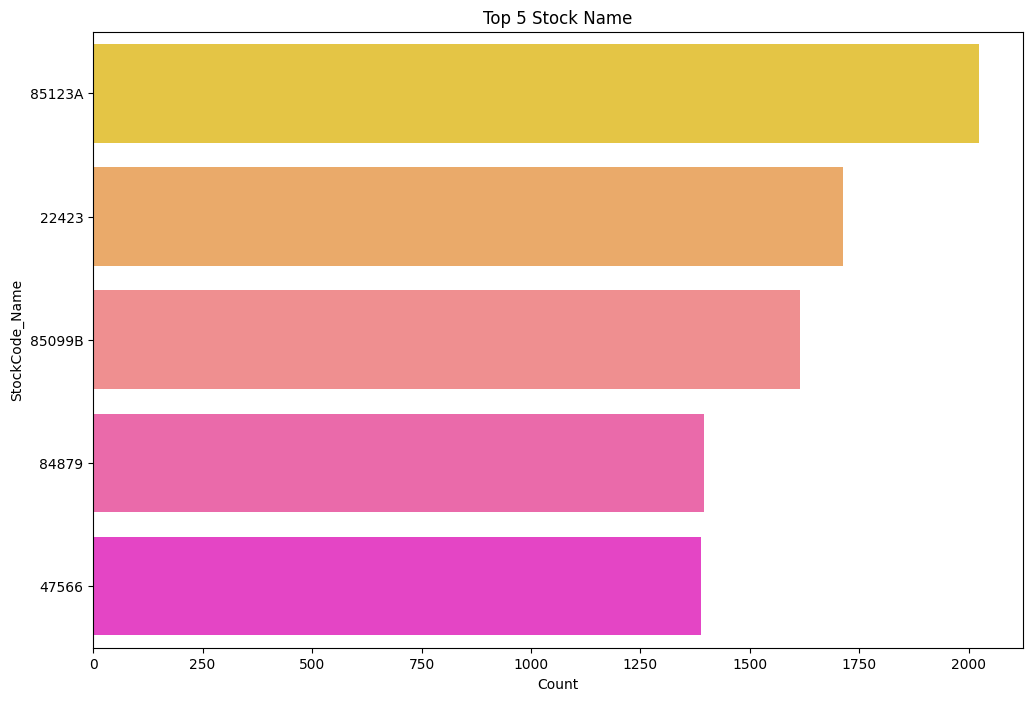

In [ ]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

**Distribution of Quantity**

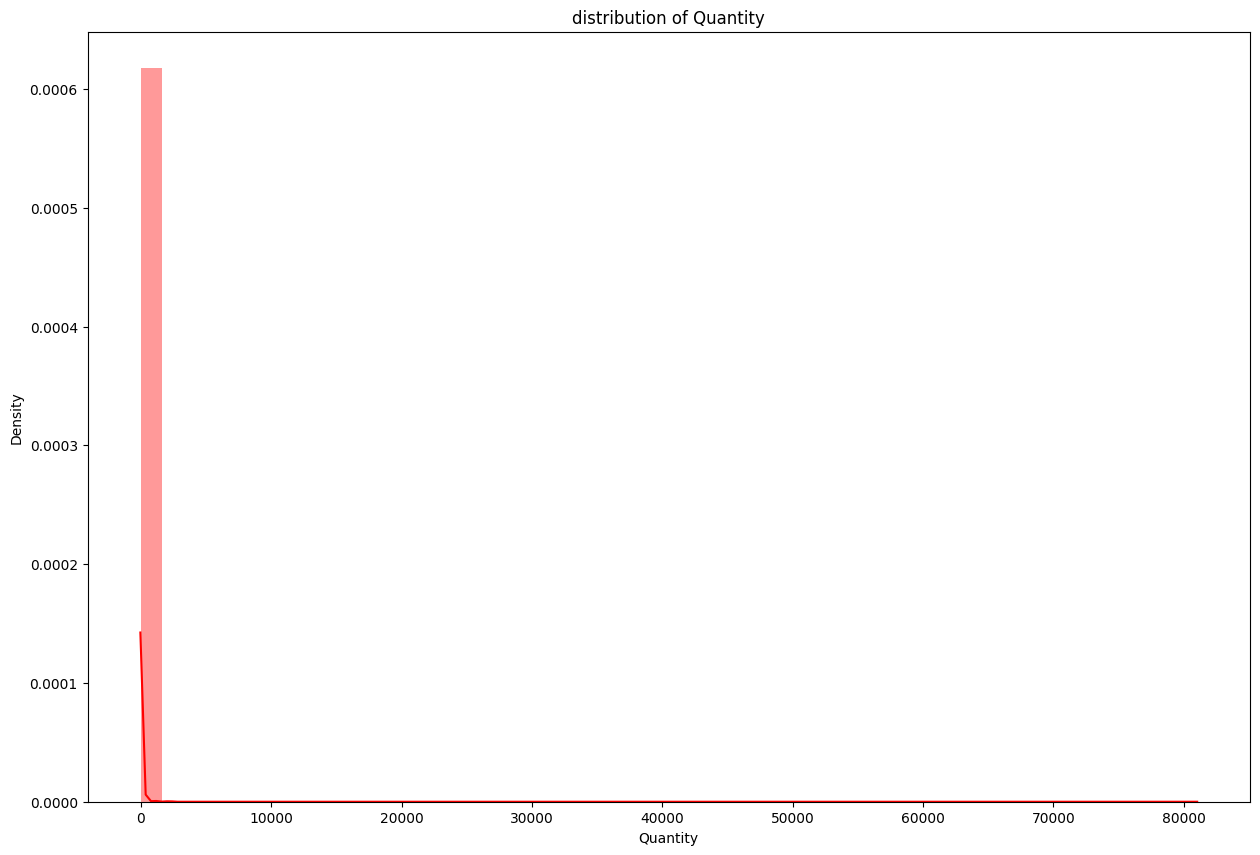

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

***Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution***

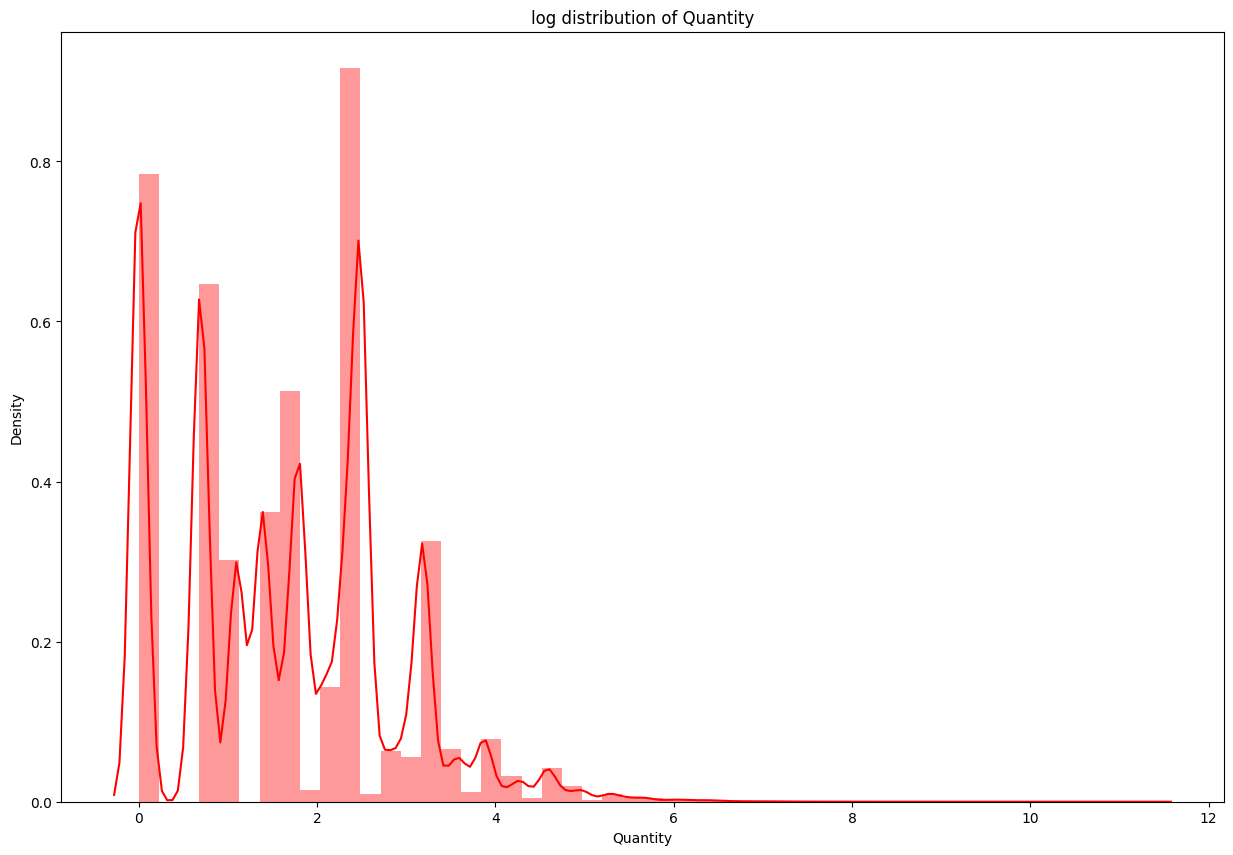

In [ ]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

# **Feature Engineering**

In [ ]:
#Converting InvoiceDate columns into date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

#Add new column depicting total amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
df.shape

(392692, 12)

**Months wise Transactions**

In [ ]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  63168
1     October  48793
2    December  42696
3   September  39669
4         May  28073
5        June  26926
6       March  26870
7      August  26790
8        July  26580
9       April  22433
10    January  20988
11   February  19706

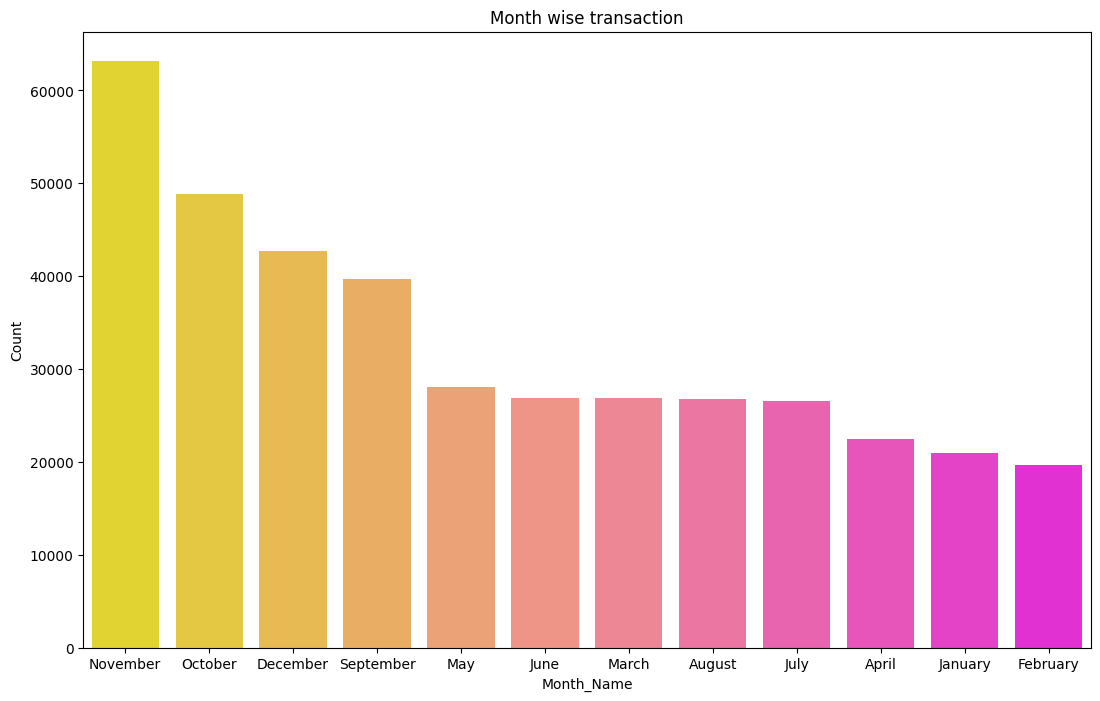

In [ ]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

♦ ***Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.***

♦ ***Least numbers of purchasing are in the month of April and February.***

**Day wise Transactions**

In [ ]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  79243
1  Wednesday  68040
2    Tuesday  65744
3     Monday  64231
4     Sunday  61212
5     Friday  54222

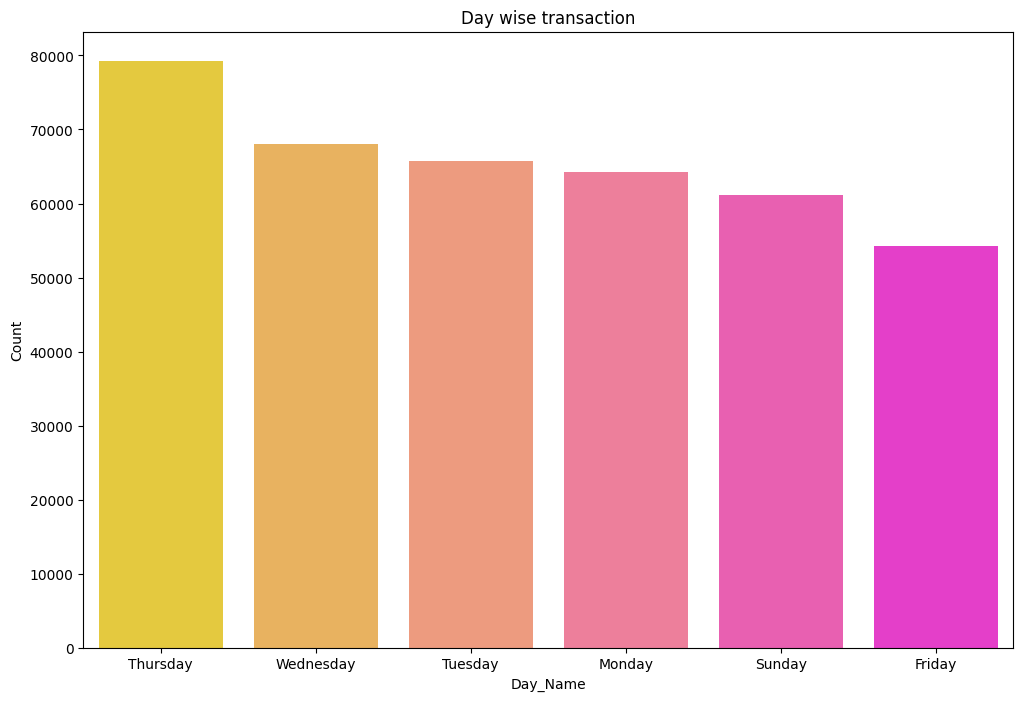

In [ ]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

**Hour Wise Transaction**

In [ ]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

Hours  Count
0      12  70938
1      13  63019
2      14  53251
3      11  48365
4      15  44790
5      10  37773
6      16  23715
7       9  21927
8      17  12941
9       8   8687
10     19   3233
11     18   2895
12     20    778
13      7    379
14      6      1

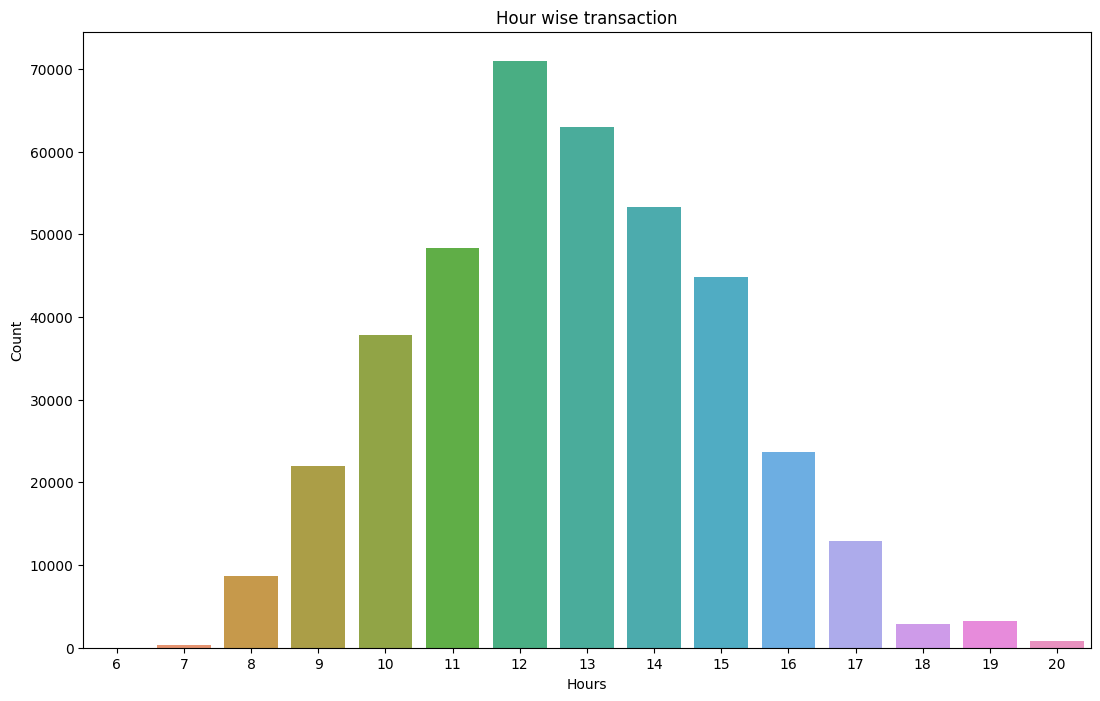

In [ ]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [ ]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

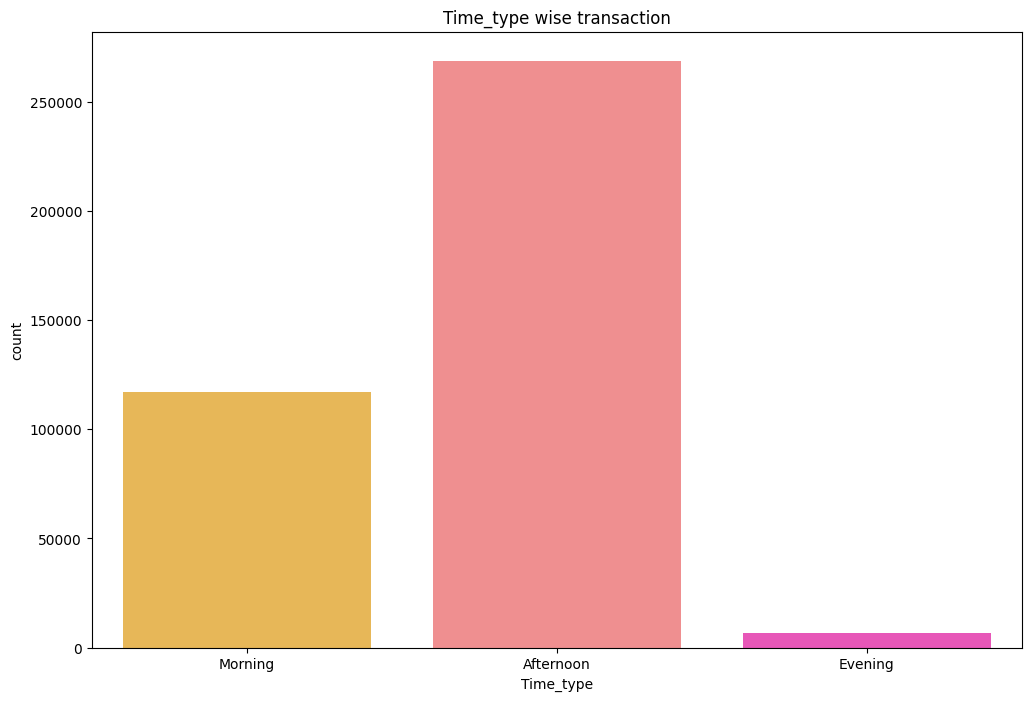

In [ ]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='spring_r');

***Most of the customers have purchased the items in Afternoon.*** 

***Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increase transaction at evening we can do one thing provide the offers/discounts at evening***

#**RFM Modelling**

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

**RFM stands for the three dimensions:**
* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary – How much do they spend?

In [ ]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of invoice no. of transaction(s)
#Monetary = Sum of Total Amount for each customer

import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                            'InvoiceNo': lambda x: x.count(), 
                                            'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)
# Fisrt 5 values.
RFMScores.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [ ]:
# Function to create Histogram 
def Histogram(A):
    fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.histplot(data=RFMScores,kde=True, x=A,bins=25,ax=ax,color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(A, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
    ax.set_title("Histogram", color='#F5E9F5', fontsize=30)

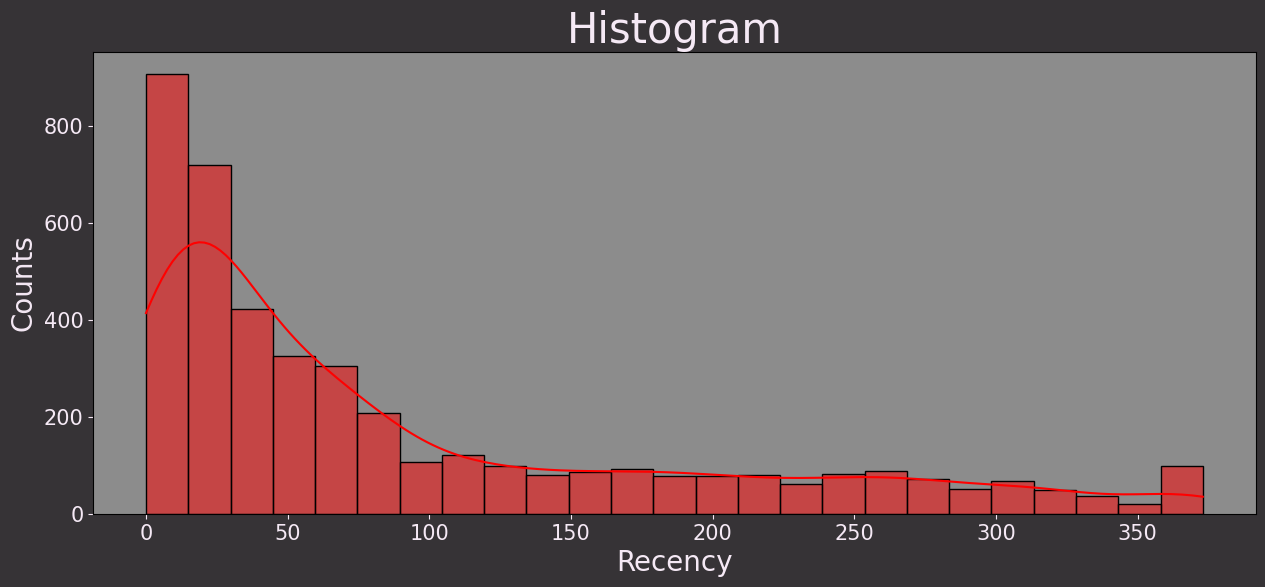

In [ ]:
# Histogram for Recency
Histogram("Recency")

* Recency histogram is Right skewed

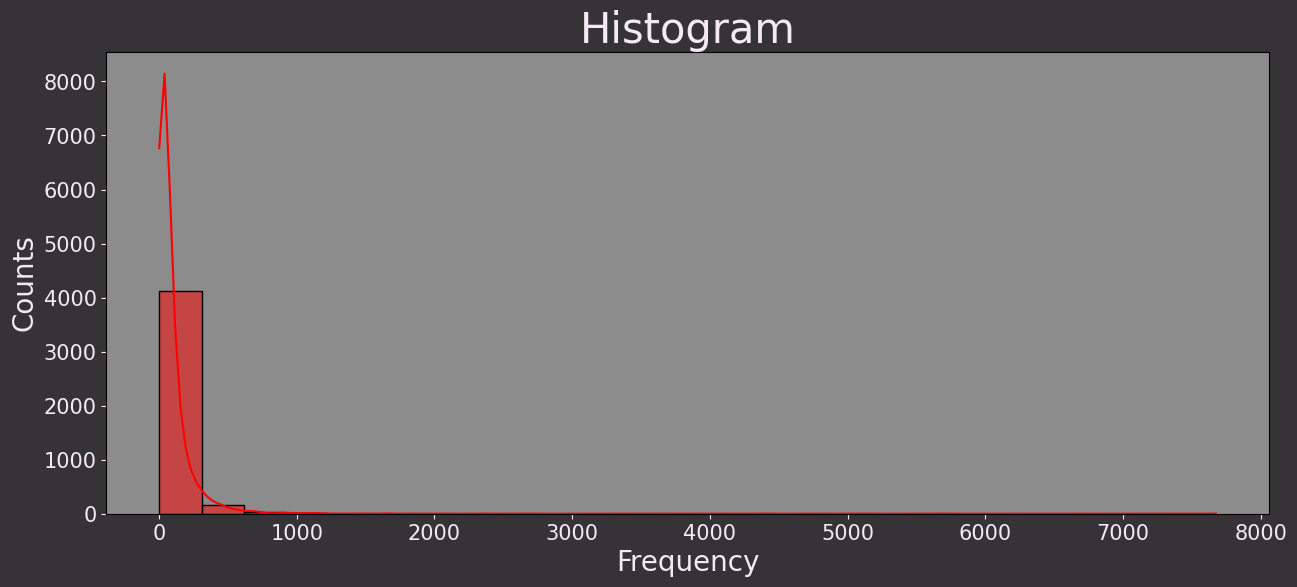

In [ ]:
# Histogram for Frequency
Histogram("Frequency")

* Frequency histogram is right skewed

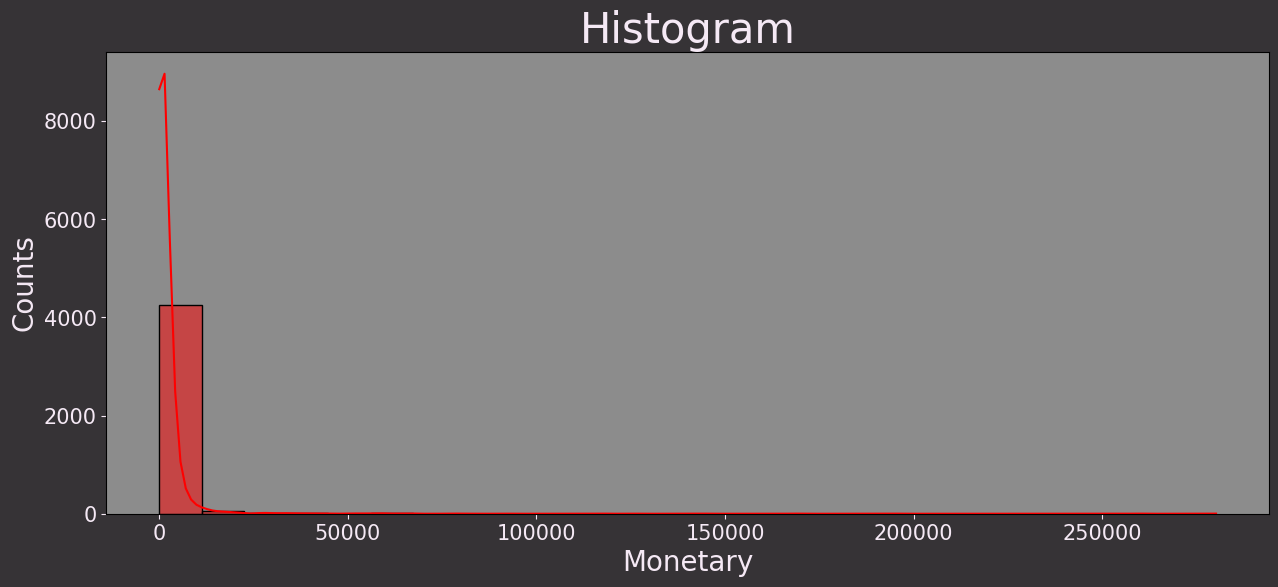

In [ ]:
# Histogram for Monetary
Histogram("Monetary")

* Monetary histogram is right skewed

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [ ]:
#Functions to create R, F and M segments
# x = recency
# p = "receny"
# d = quantiles 

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,)) 

In [ ]:
# Fisrt 5 values.
RFMScores.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()                      

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
        
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

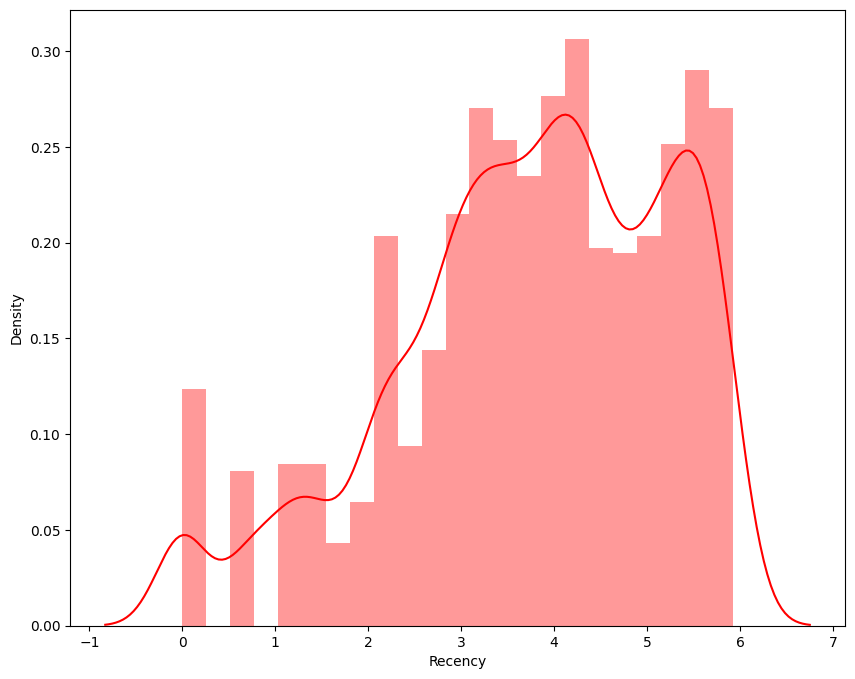

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

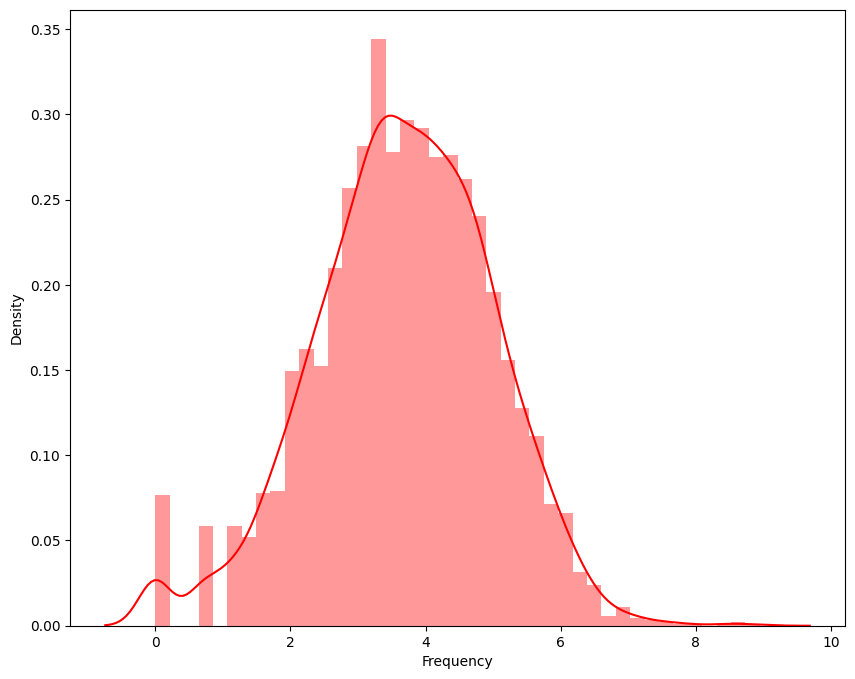

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

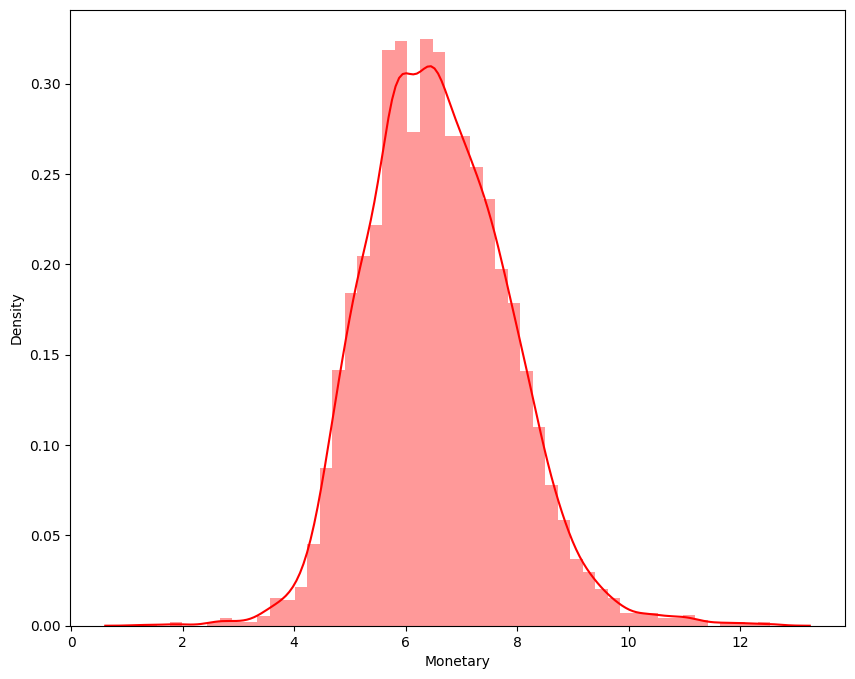

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

***As we can see from the above plots, skewness has been removed from the data.***

In [ ]:
from numpy import math
from sklearn import preprocessing
RFMScores['Recency_log'] = RFMScores['Recency'].apply(math.log)
RFMScores['Frequency_log'] = RFMScores['Frequency'].apply(math.log)
RFMScores['Monetary_log'] = RFMScores['Monetary'].apply(math.log)

#Clustering


### **K-Means Clustering on Recency and Monetary**

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.**

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.**

In [ ]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### **Silhouette score method**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

In [ ]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=RFMScores[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4207311225472853
For n_clusters = 3, silhouette score is 0.34248545236022043
For n_clusters = 4, silhouette score is 0.365003391698382
For n_clusters = 5, silhouette score is 0.3376437206055347
For n_clusters = 6, silhouette score is 0.34460495090344395
For n_clusters = 7, silhouette score is 0.3476643470699169
For n_clusters = 8, silhouette score is 0.33809420128722073
For n_clusters = 9, silhouette score is 0.34529720968470795
For n_clusters = 10, silhouette score is 0.3485211708270644
For n_clusters = 11, silhouette score is 0.33788290134589044
For n_clusters = 12, silhouette score is 0.34243517702246384
For n_clusters = 13, silhouette score is 0.3394718038338033
For n_clusters = 14, silhouette score is 0.345005015839166
For n_clusters = 15, silhouette score is 0.3360584305410274


####**Elbow Method**

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

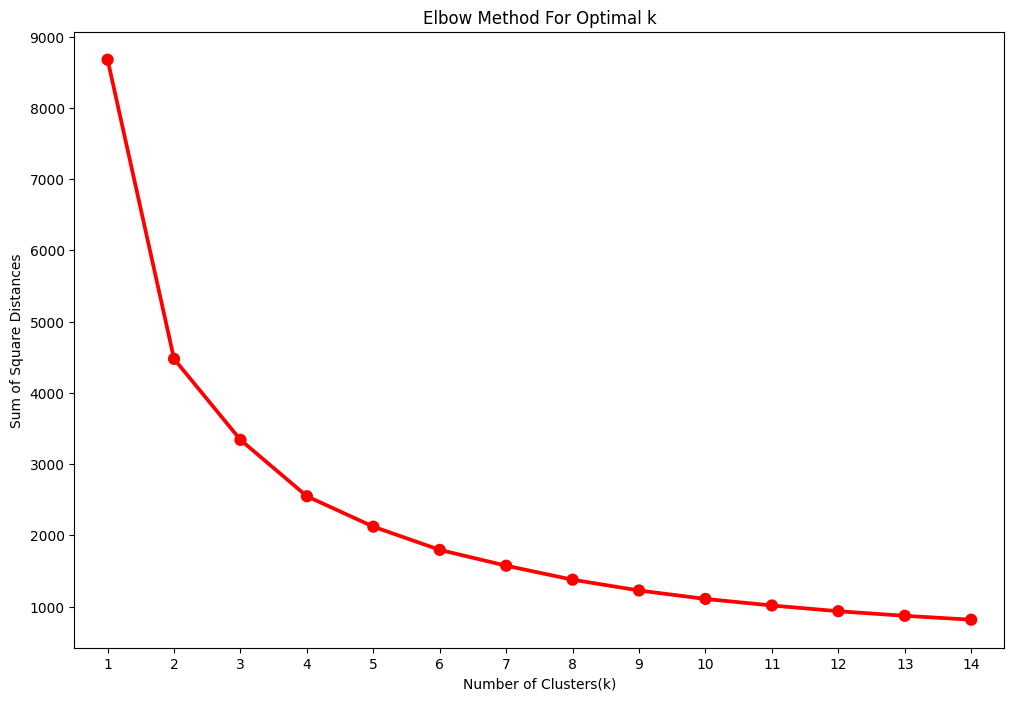

In [ ]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=RFMScores[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
centers

array([[ 0.58589285, -0.57304789],
       [-0.84438468,  0.82587262]])

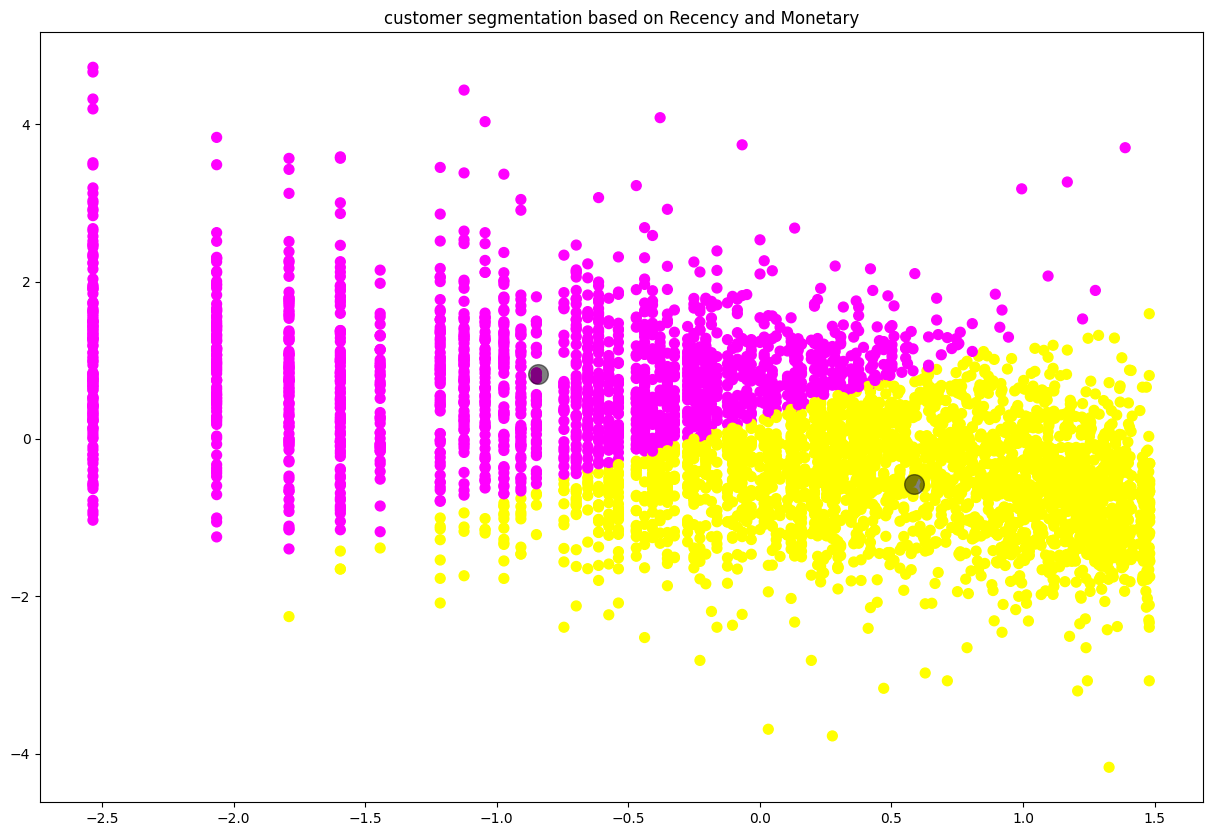

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.***

###**DBSCAN Clustering on Recency and Monetary**

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

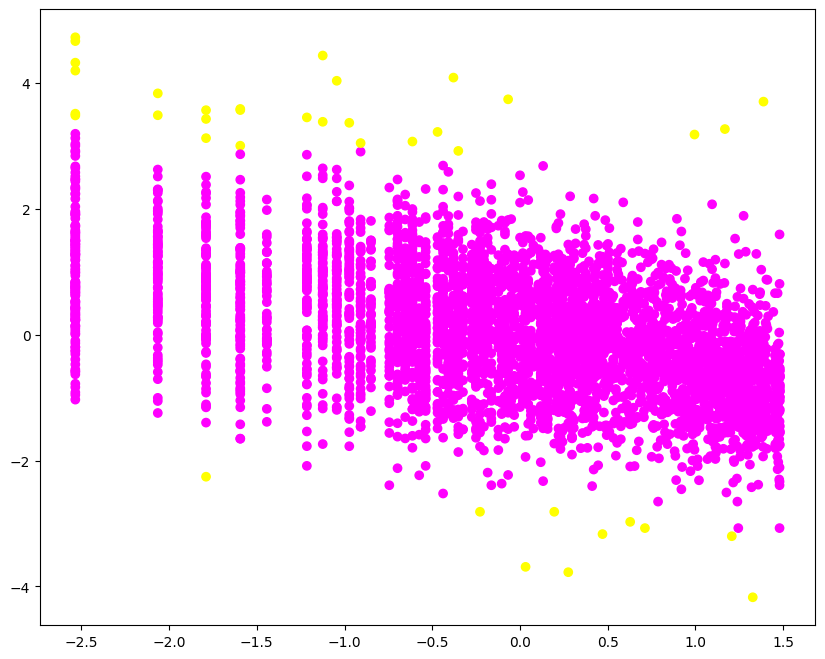

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,8))                                           
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');                                

♦ ***Here we can see that, Customers are separated when we cluster them by Recency and Monetary.***

#### **Silhouette score method**

In [ ]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=RFMScores[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4787251274240349
For n_clusters = 3, silhouette score is 0.40782389338277614
For n_clusters = 4, silhouette score is 0.37246851391410146
For n_clusters = 5, silhouette score is 0.3475078076946552
For n_clusters = 6, silhouette score is 0.3622055288222191
For n_clusters = 7, silhouette score is 0.34408699173887397
For n_clusters = 8, silhouette score is 0.35280156040116306
For n_clusters = 9, silhouette score is 0.3466873661839901
For n_clusters = 10, silhouette score is 0.35897517689154285
For n_clusters = 11, silhouette score is 0.368290279130964
For n_clusters = 12, silhouette score is 0.3544692632753517
For n_clusters = 13, silhouette score is 0.3627519964721623
For n_clusters = 14, silhouette score is 0.37065436365871446
For n_clusters = 15, silhouette score is 0.3625214172510916


#### **Elbow Method**

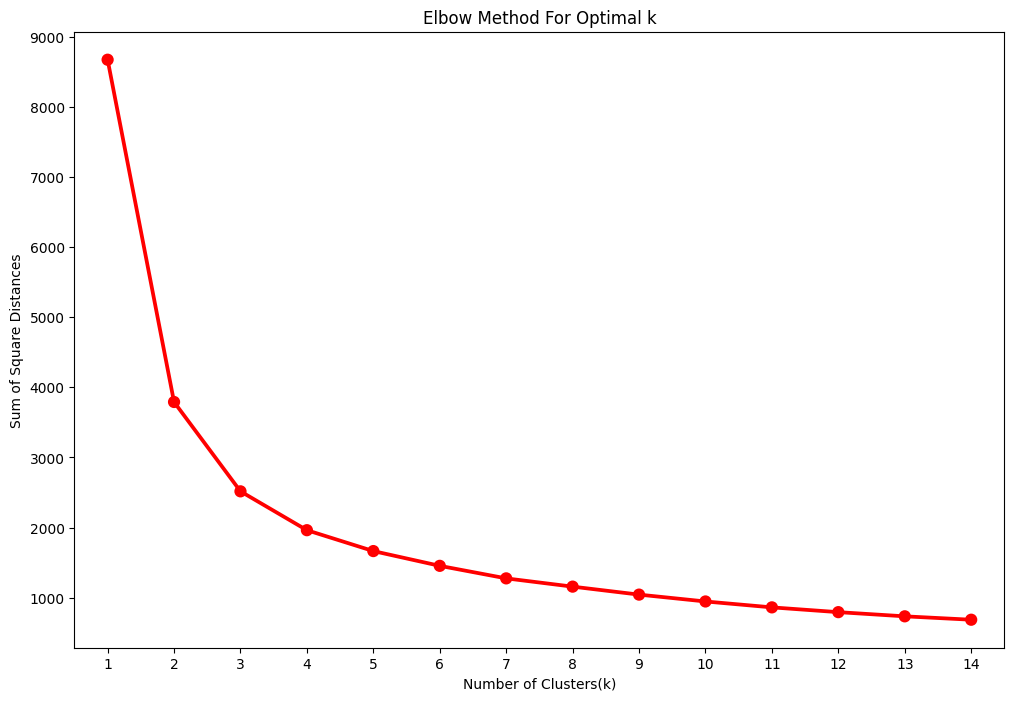

In [ ]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K-Means Clustering on Frequency and Monetary

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)   

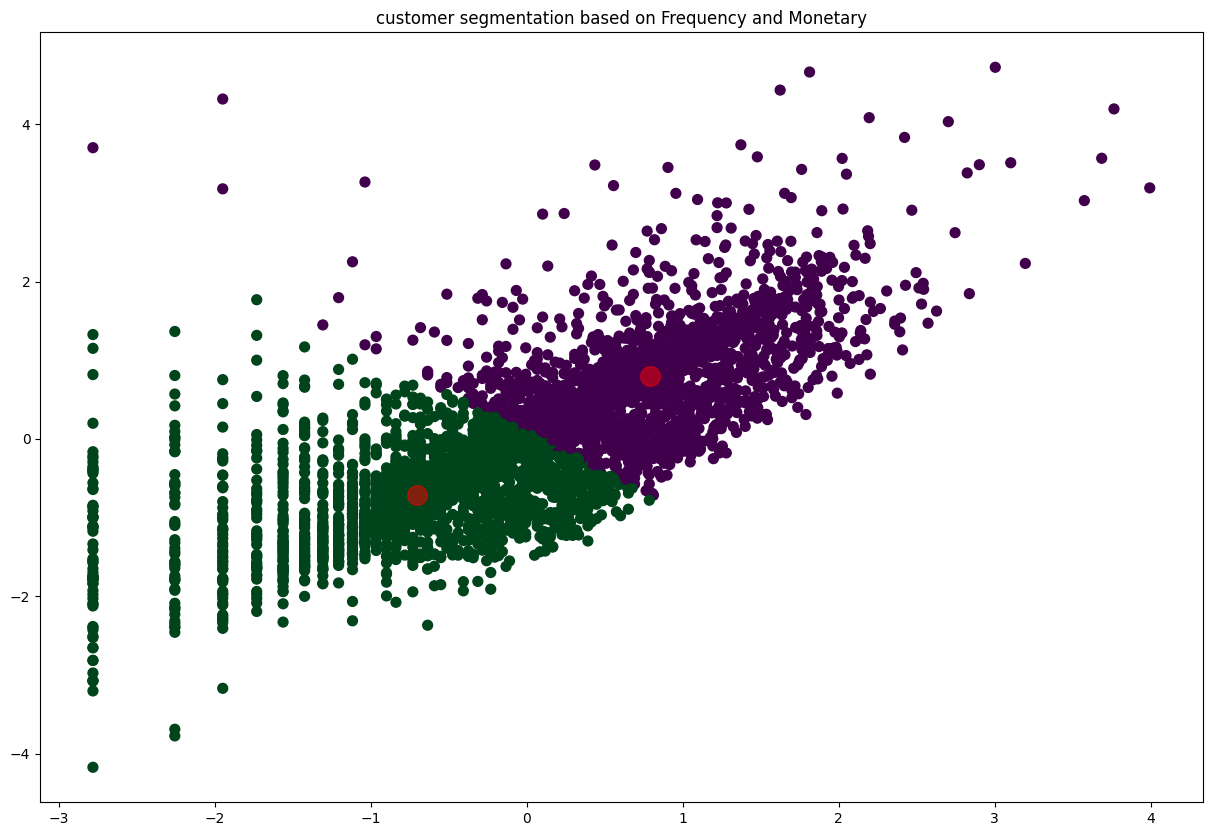

In [ ]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);                   

♦ ***Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.***

## DBSCAN Clustering on Frequency and Monetary

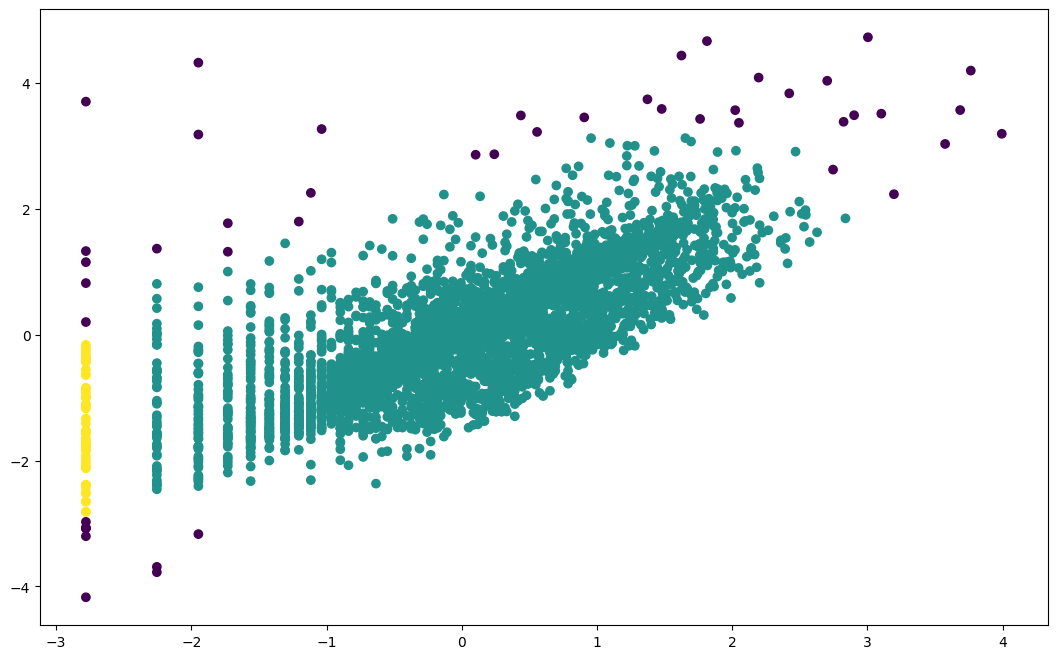

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);                                          

## **K-Means Clustering on Recency, Frequency and Monetary**

In [ ]:
#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=RFMScores[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.39559432494517566
For n_clusters = 3 The average silhouette_score is : 0.3058876637738773
For n_clusters = 4 The average silhouette_score is : 0.3028850229495839
For n_clusters = 5 The average silhouette_score is : 0.2792649772843255
For n_clusters = 6 The average silhouette_score is : 0.27928761515967193
For n_clusters = 7 The average silhouette_score is : 0.2682462889803735
For n_clusters = 8 The average silhouette_score is : 0.2642066237713513
For n_clusters = 9 The average silhouette_score is : 0.25352442378461204
For n_clusters = 10 The average silhouette_score is : 0.2648431840242154


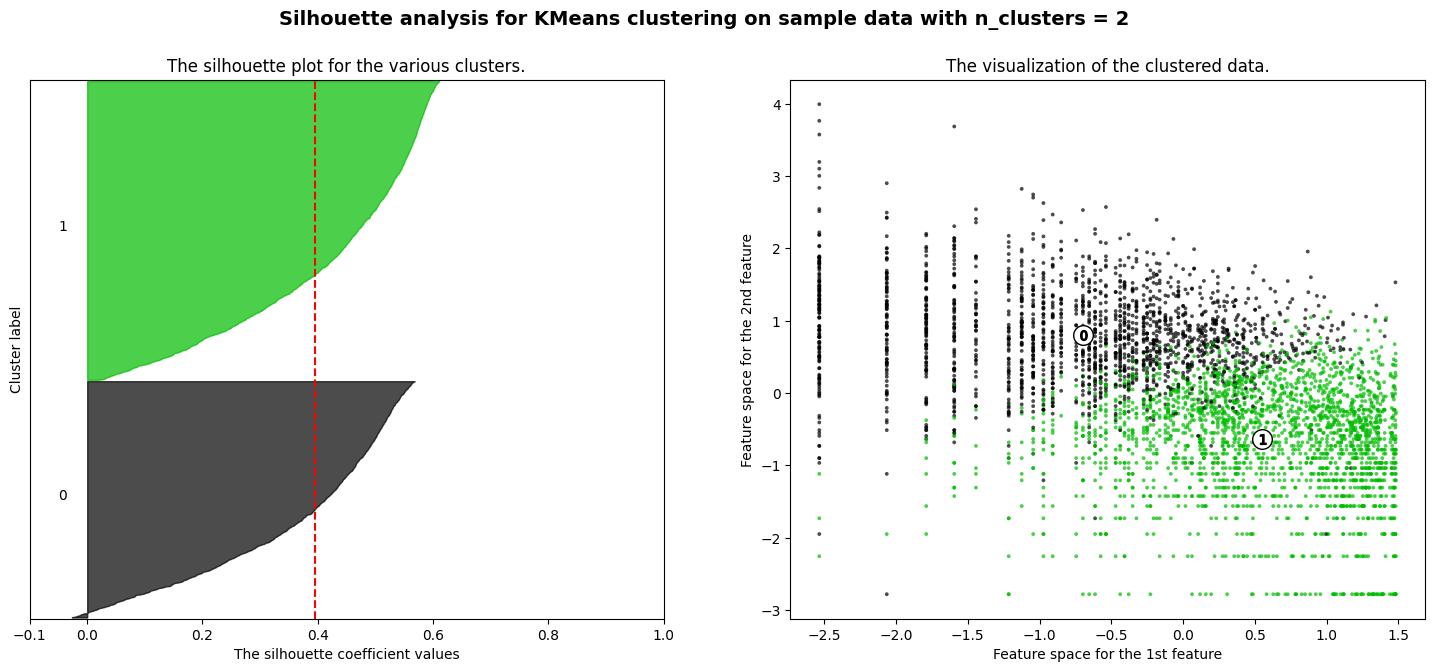

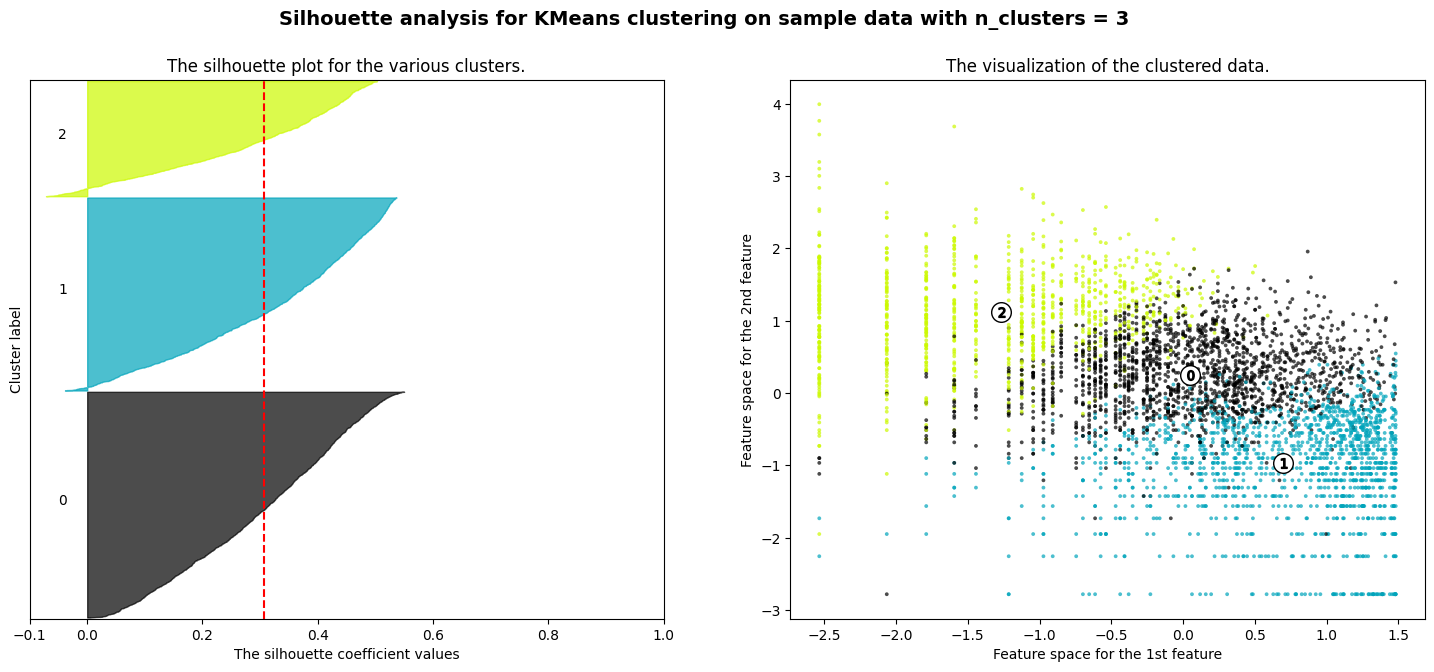

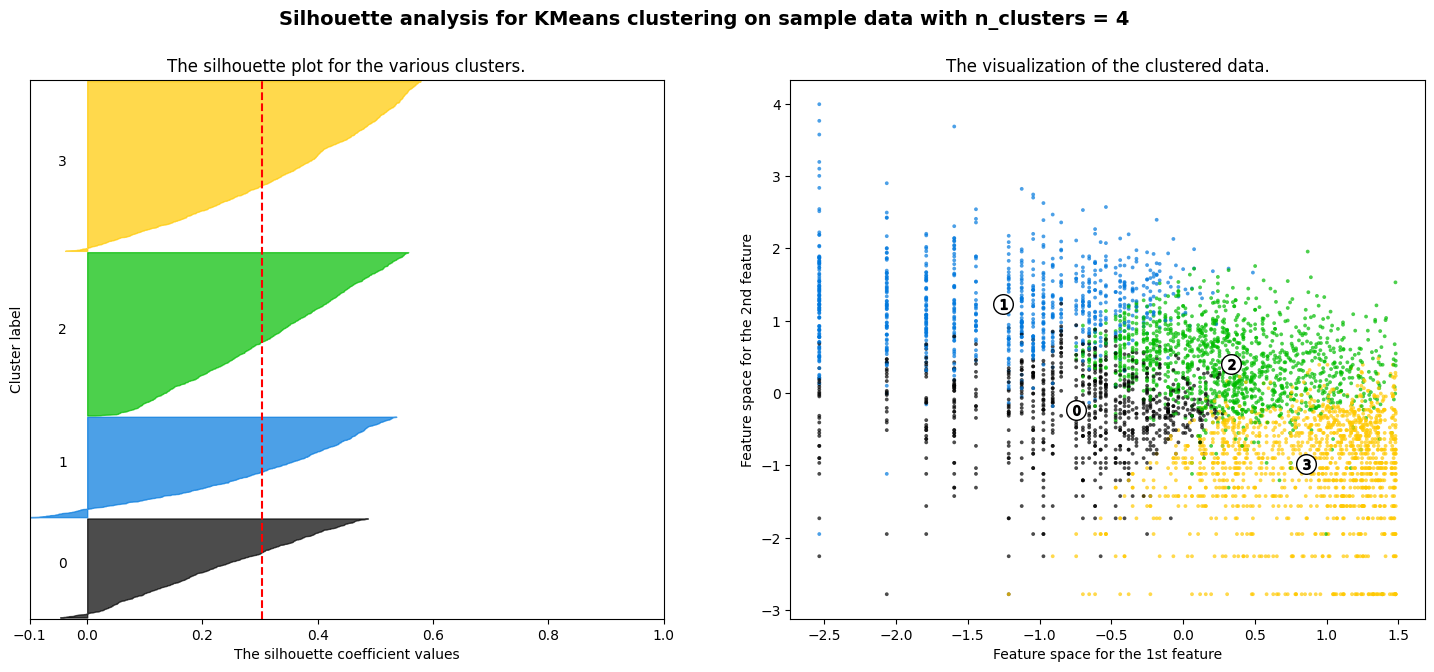

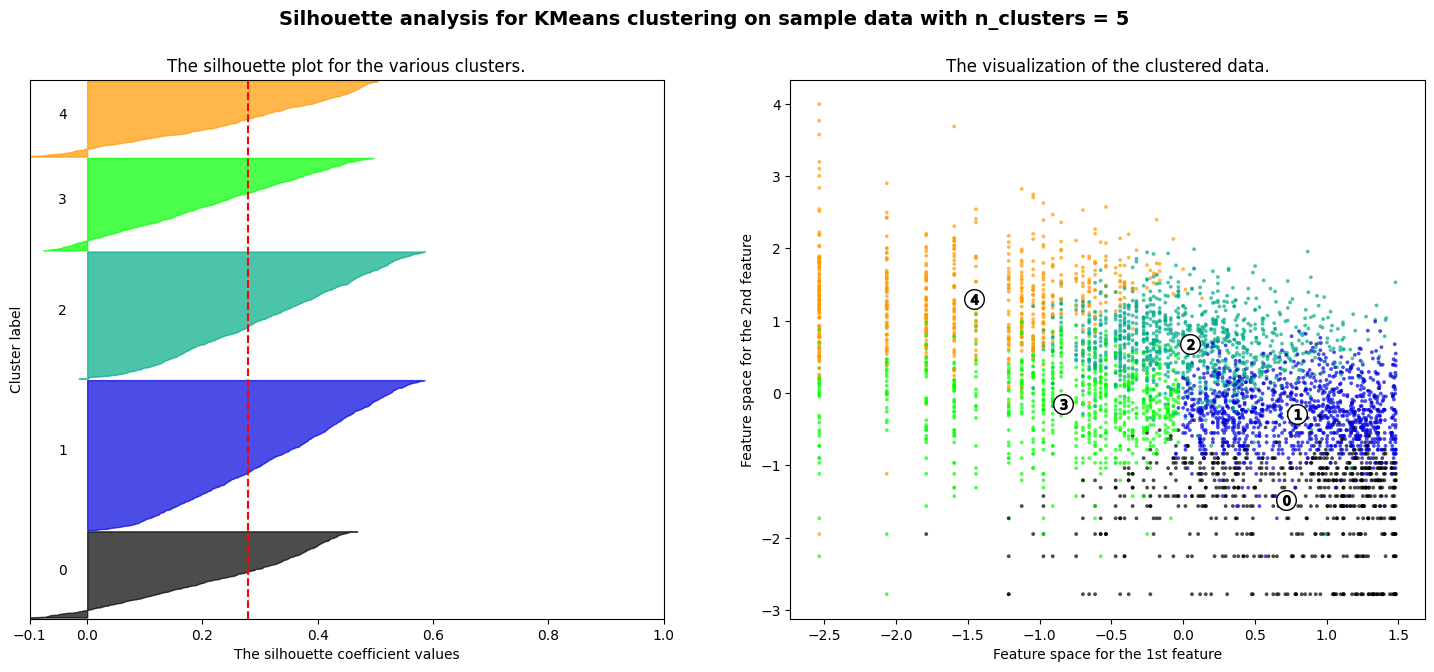

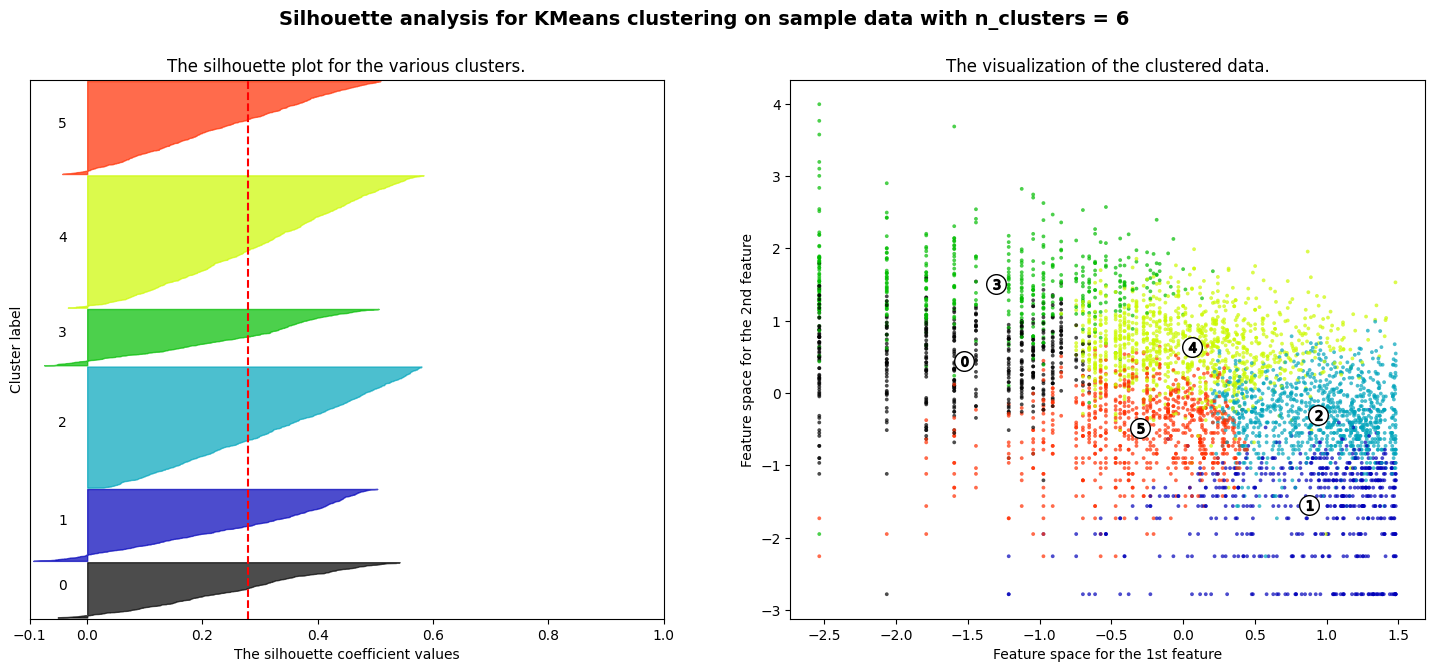

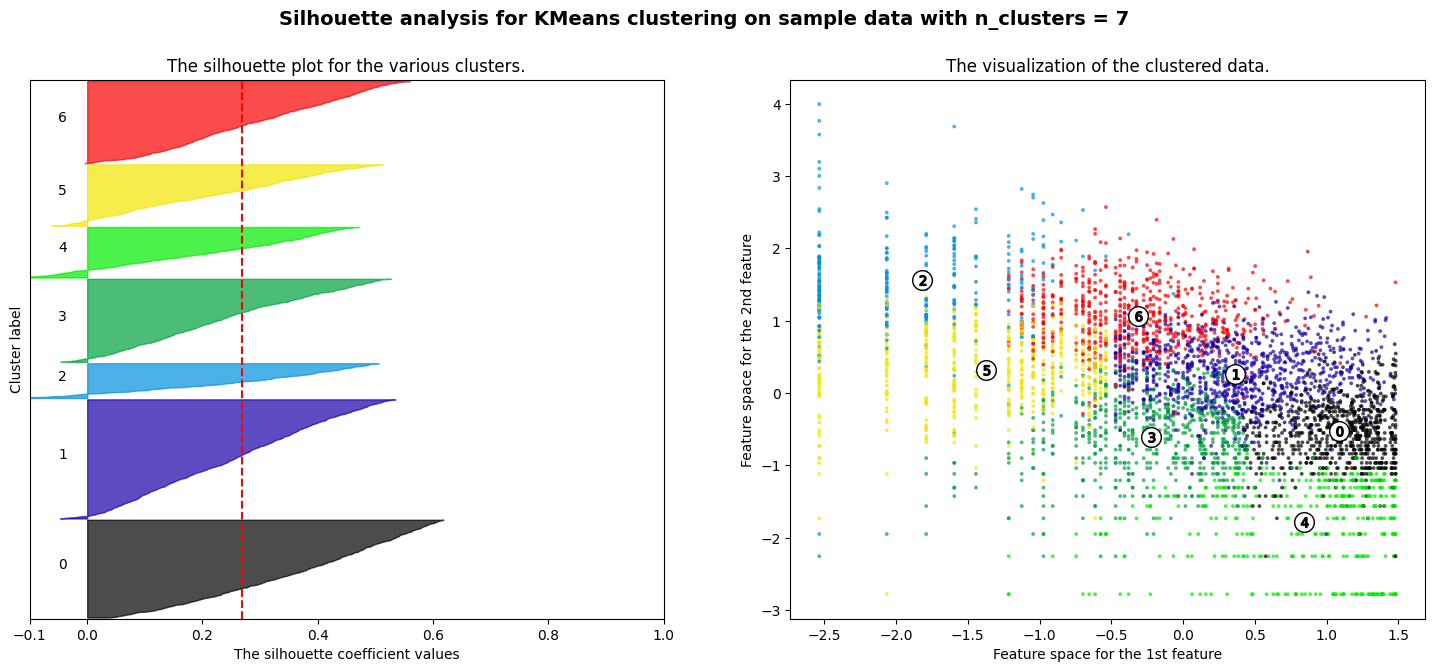

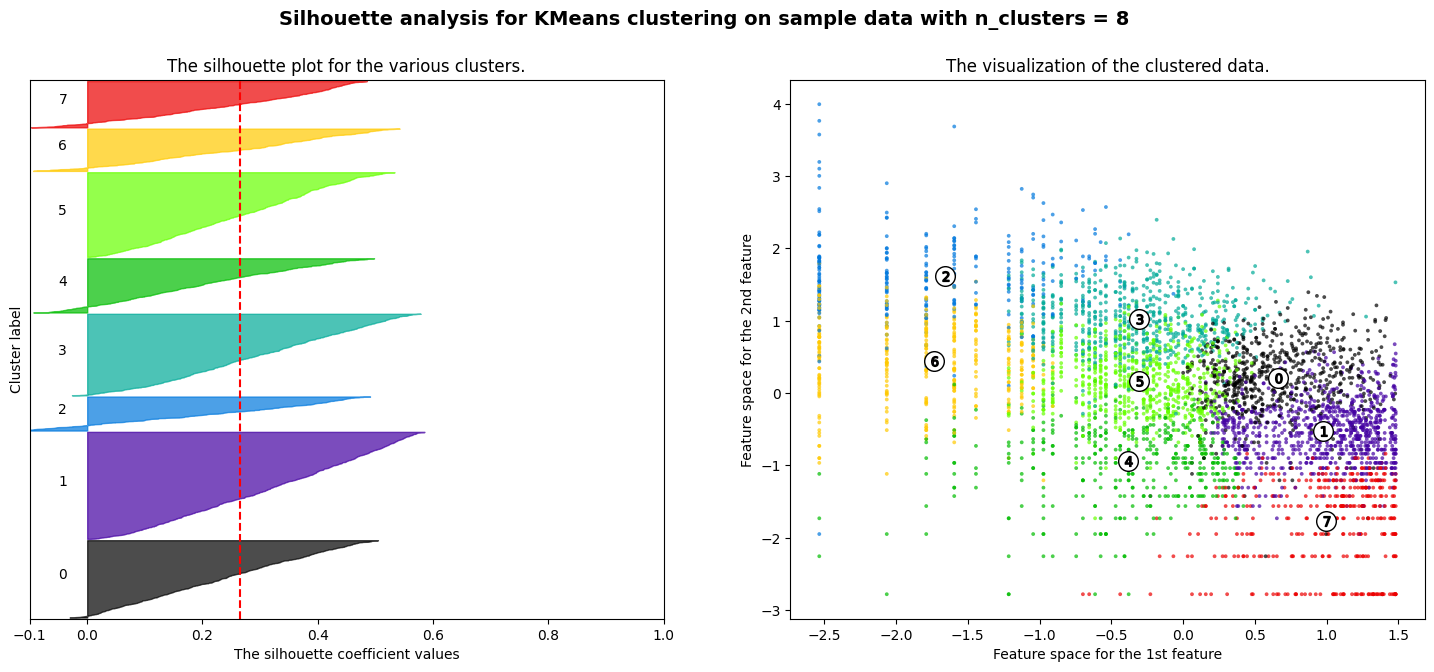

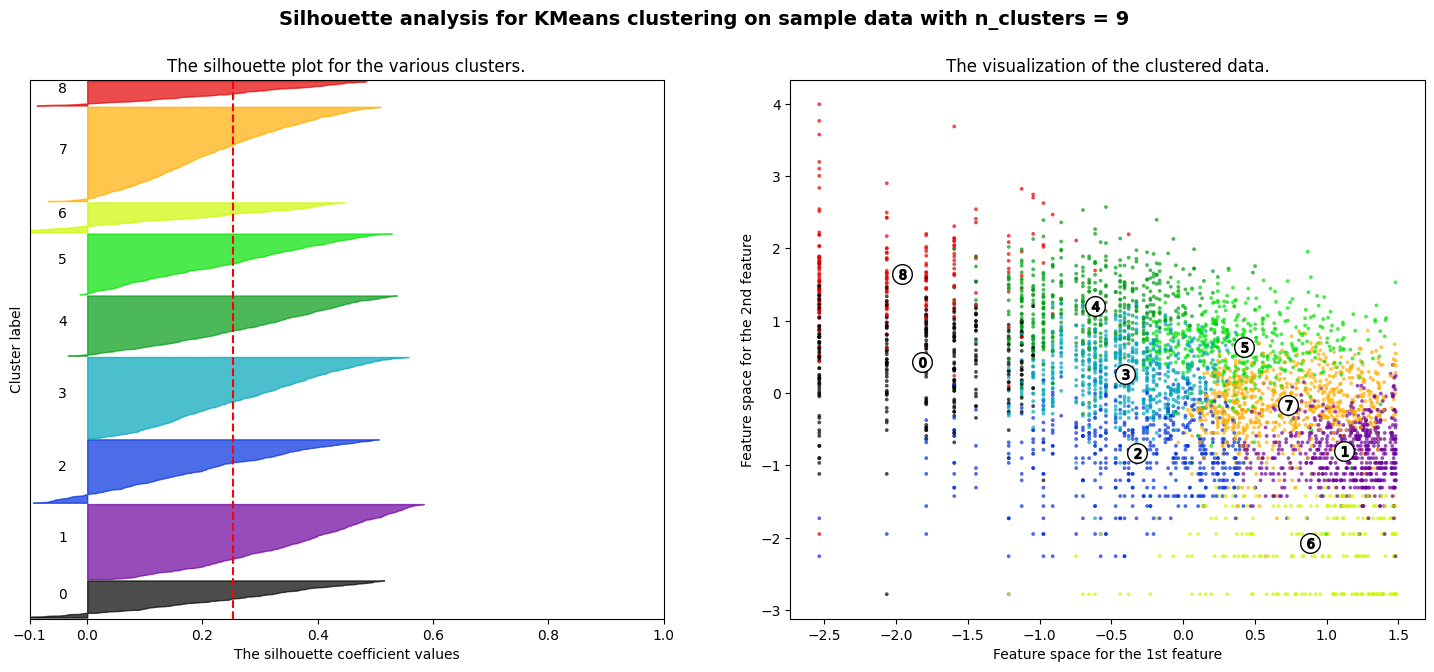

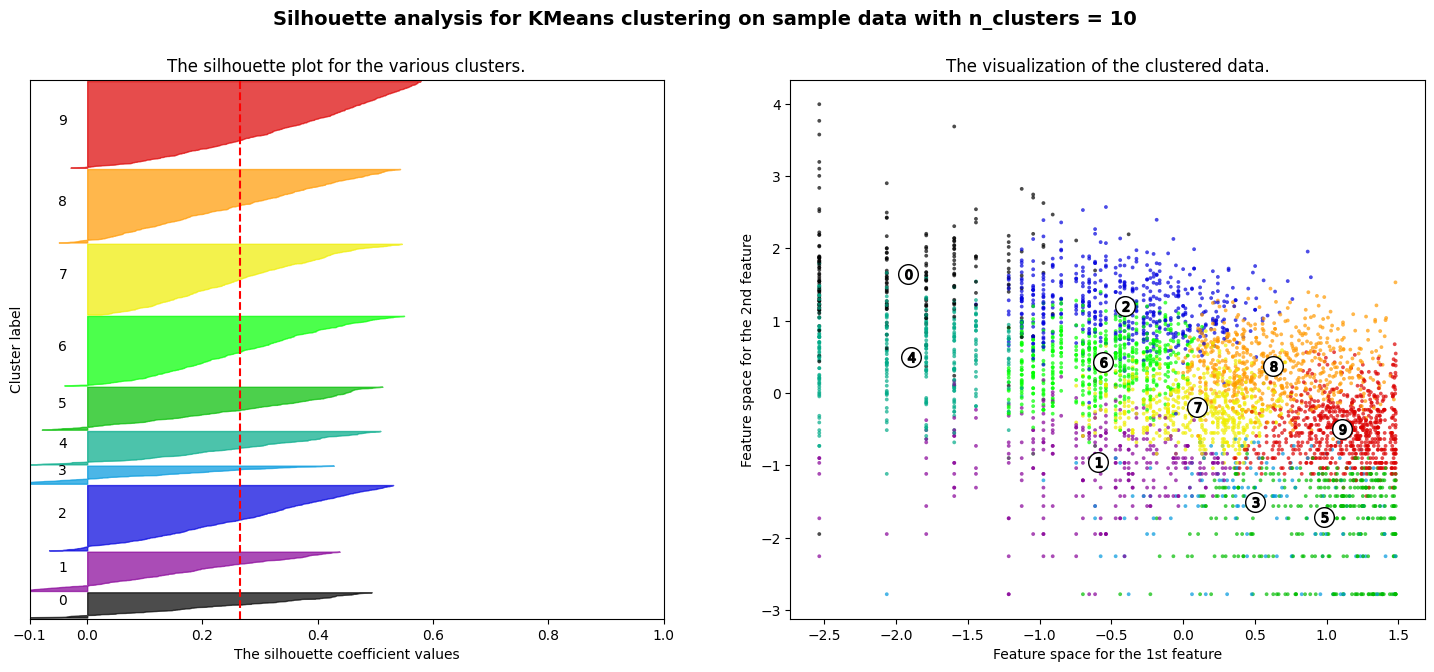

In [ ]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]                                    
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

***From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

In [ ]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
X

array([[ 1.38812151e+00, -2.77997755e+00,  3.70020082e+00],
       [-2.06451271e+00,  1.16035591e+00,  1.41325634e+00],
       [ 3.93612423e-01, -1.79855086e-01,  7.19951296e-01],
       ...,
       [-1.21485530e+00, -8.98473276e-01, -1.11257171e+00],
       [-1.78951541e+00,  2.20270486e+00,  8.22521824e-01],
       [ 3.63983294e-04,  4.36868426e-01,  7.37416227e-01]])

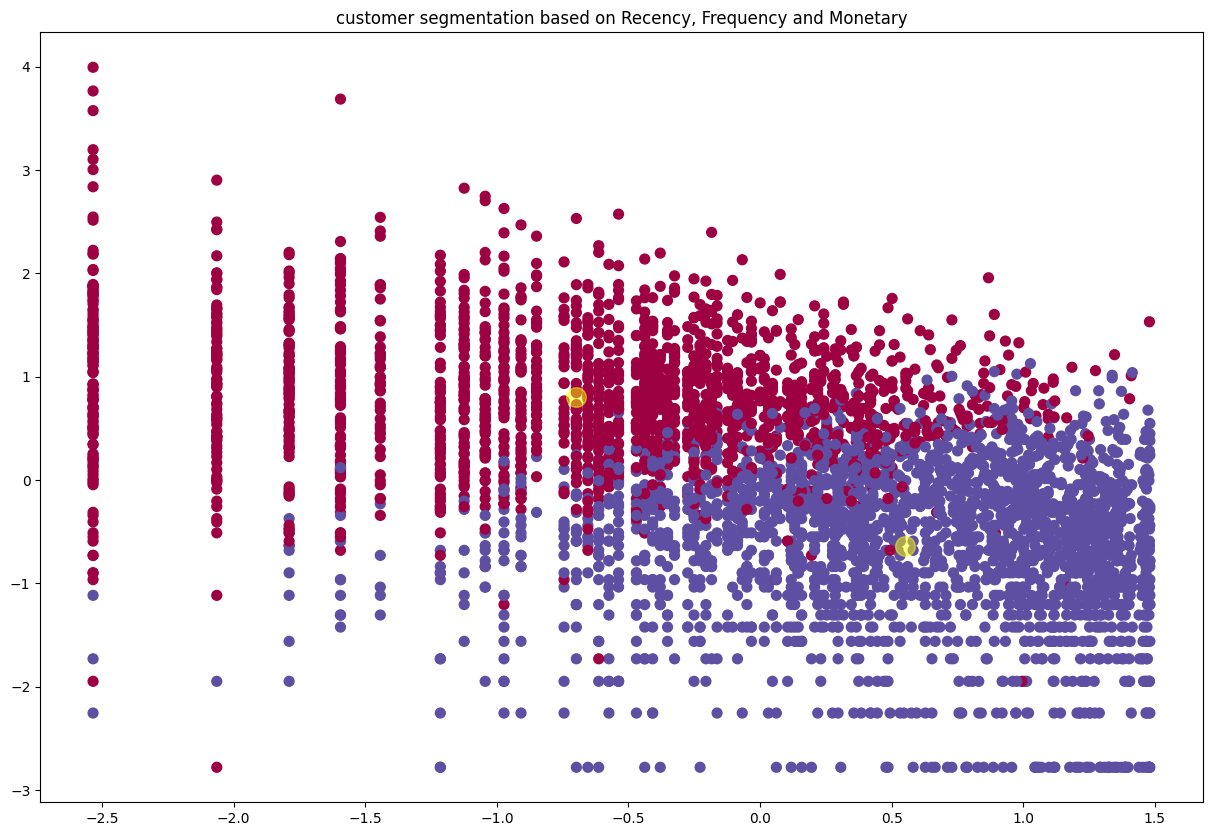

In [ ]:
#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

 ***Here we can see that, Customers are  separated when we cluster them by Recency, Frequency and Monetary.***

####  Elbow Method

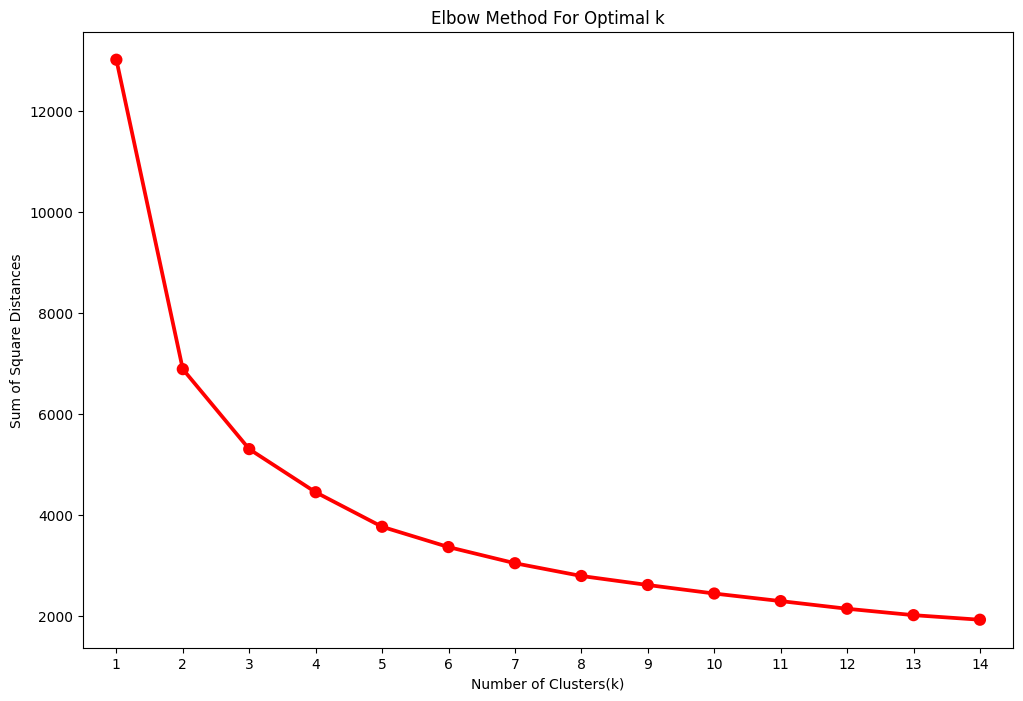

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.

In [ ]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
RFMScores.head(10)                                                       

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

## **Hierarchical clustering**

> Indented block

> Indented block

> Indented block







Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

### **Dendogram**

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

**Dendogram to find the optimal number of clusters**

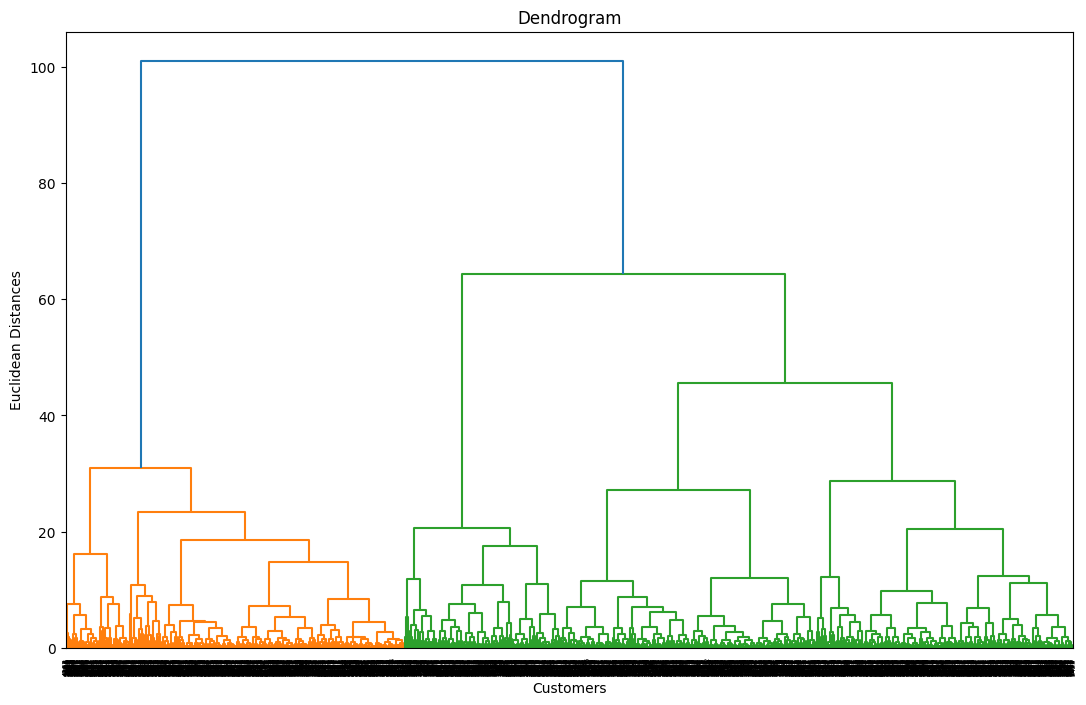

In [ ]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

Here, we can see No. of Clusters = 2

In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

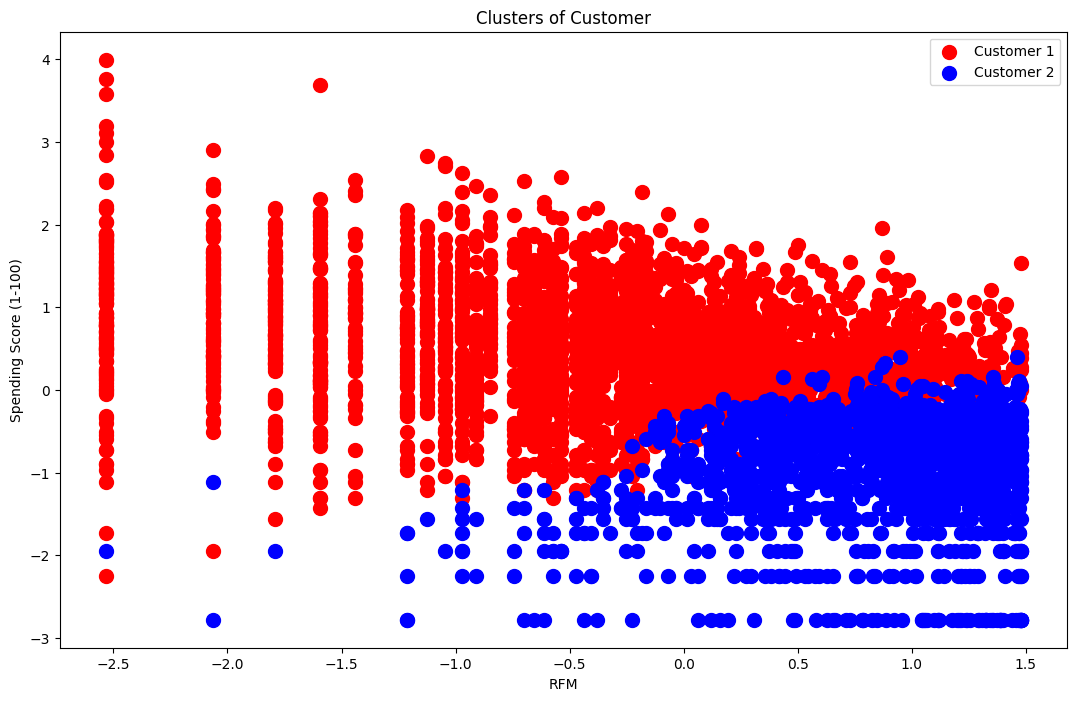

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#let's check mean values of the cluster for recency, frequnecy and monetary

RFMScores.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

Recency   Frequency     Monetary
Cluster                                     
0         30.753503  172.853659  4025.872565
1        141.072999   24.721277   468.416616

We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in company's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.

# **Summary**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

# **Conclusion**

*   ***This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.*** 

*   ***Using  a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters  and got a silhoutte score of 0.39 for two clusters***

*  ***By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.*** 

*   ***The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large Scale.***

